<a href="https://colab.research.google.com/github/OMAR1992/OMAR1992/blob/main/anomalias_oms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Eliminamos los datos anomalos**

## Importamos librerias

In [140]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [141]:
print('pandas: ' + pd.__version__)
print('numpy: ' + np.__version__)
print('matplotlib: ' + matplotlib.__version__)

pandas: 1.5.3
numpy: 1.22.4
matplotlib: 3.7.1


## Leemos xlsx

In [142]:
xlsx = '/content/drive/MyDrive/Colab Notebooks/Datos_Enlace_Cozumel_2022 (1).xlsx'
pd_xlsx = pd.read_excel(xlsx,sheet_name='DG',usecols='A:C')

In [143]:
q1 = pd_xlsx['COZ-sin_CTg'].quantile(q = 0.01)
q2 = pd_xlsx['COZ-sin_CTg'].quantile(q = 1)
print(q1,'\n',q2)

21.357668143719998 
 51.1255056141


<Axes: >

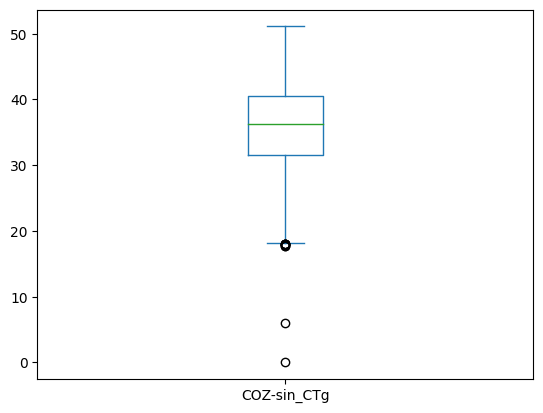

In [148]:
pd_xlsx.plot(x='Fecha',y='COZ-sin_CTg',kind='box')

In [145]:
pd_xlsx2 = pd_xlsx.copy()
cond1 = (pd_xlsx['COZ-sin_CTg'] > q1) | (pd_xlsx['COZ-sin_CTg'] < q2)
cond2 = (pd_xlsx['COZ-sin_CTg'] < q1) | (pd_xlsx['COZ-sin_CTg'] > q2)
pd_temp = pd_xlsx.loc[cond2]
pd_temp['COZ-sin_CTg'] = pd_xlsx.loc[cond1]['COZ-sin_CTg'].mean()
pd_xlsx2.update(pd_temp)

<ipython-input-145-7489a9bafbd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_temp['COZ-sin_CTg'] = pd_xlsx.loc[cond1]['COZ-sin_CTg'].mean()


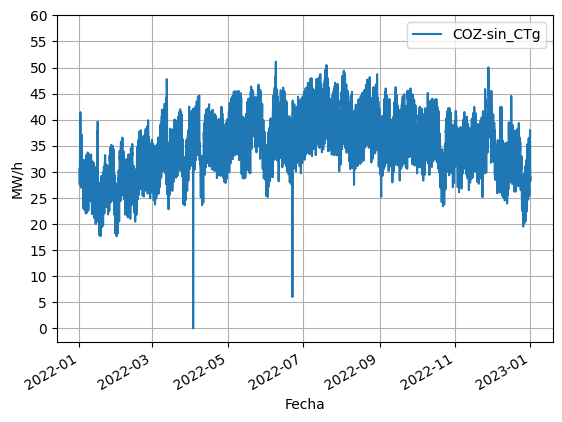

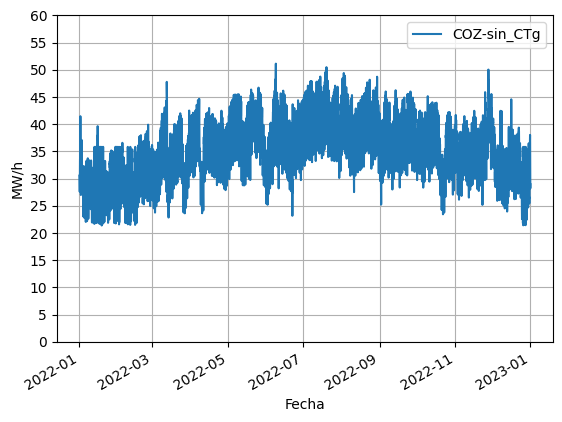

In [146]:
yticks = np.arange(0,61,5)
g1 = pd_xlsx.plot(x='Fecha',
                  y='COZ-sin_CTg',
                  yticks=yticks,
                  grid=True,
                  xlabel='Fecha',
                  ylabel='MW/h',)
g2 = pd_xlsx2.plot(x='Fecha',
                   y='COZ-sin_CTg',
                   yticks=yticks,
                   grid=True,
                   xlabel='Fecha',
                   ylabel='MW/h',)

<Axes: ylabel='Density'>

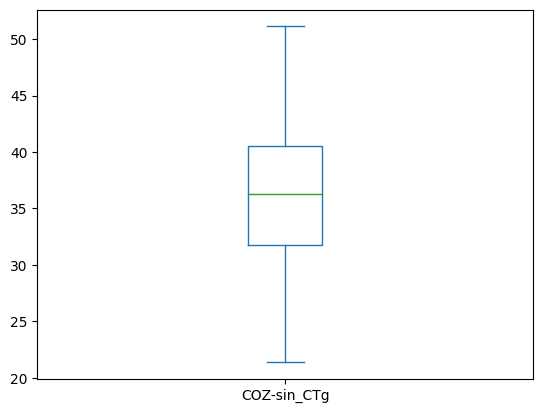

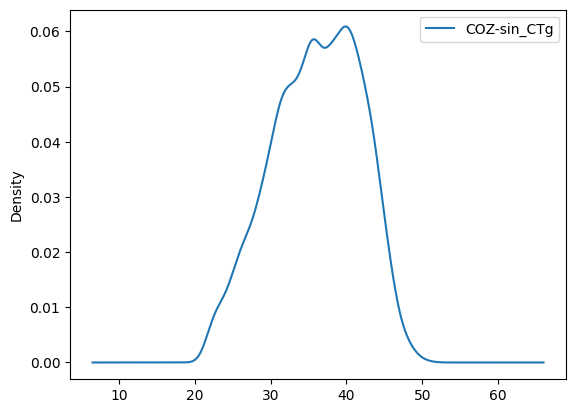

In [150]:
pd_xlsx2.plot(x='Fecha',y='COZ-sin_CTg',kind='box')
pd_xlsx2.plot(x='Fecha',y='COZ-sin_CTg',kind='kde')